In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'F:\\Dino\\UCB-USACE-LSTMs\\UCB_training\\models\\calpella_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [5]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [8]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'calpella_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("calpella")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all
Train Basin File Exists: True


In [10]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("calpella_gage.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [13]:
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

In [17]:
lstmNoPhysicsDaily.train()

2025-02-06 16:30:21,445: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_162958\testing_run_0602_163021\output.log initialized.
2025-02-06 16:30:21,449: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_162958\testing_run_0602_163021
2025-02-06 16:30:21,453: ### Run configurations for testing_run
2025-02-06 16:30:21,455: experiment_name: testing_run
2025-02-06 16:30:21,457: train_basin_file: calpella
2025-02-06 16:30:21,459: validation_basin_file: calpella
2025-02-06 16:30:21,461: test_basin_file: calpella
2025-02-06 16:30:21,465: train_start_date: 1994-10-01 00:00:00
2025-02-06 16:30:21,468: train_end_date: 2002-09-30 00:00:00
2025-02-06 16:30:21,471: validation_start_date: 2002-10-01 00:00:00
2025-02-06 16:30:21,474: validation_end_date: 2005-09-30 00:00:00
2025-02-06 16:30:21,476: test_start_date: 2005-10-01 00:00:00
2025-02-06 16:30:21,478: test_end_date: 2009-09-30 00:00:00
2025-

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]
2025-02-06 16:30:33,550: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_162958\testing_run_0602_163021\validation\model_epoch008\validation_metrics.csv
2025-02-06 16:30:33,553: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_162958\testing_run_0602_163021\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_162958/testing_run_0602_163021')

got predictions


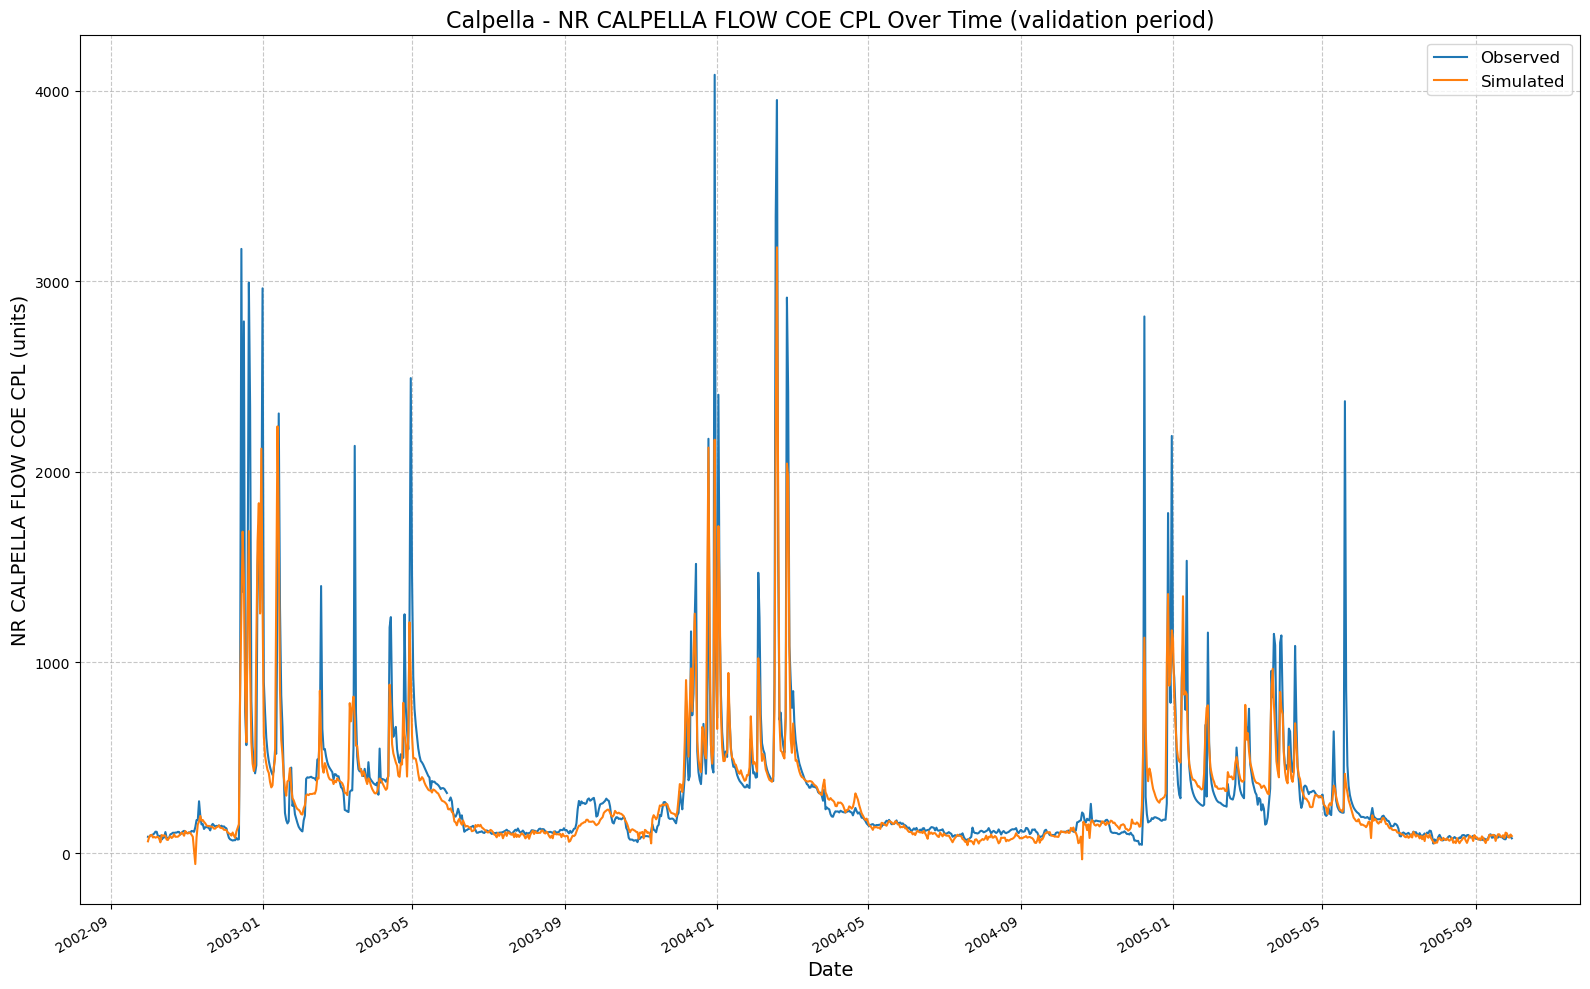

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_162958\testing_run_0602_163021\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.7568168193101883,
 'MSE': 41659.77734375,
 'RMSE': 204.1072692084973,
 'KGE': 0.7131982910534209,
 'Alpha-NSE': 0.7506234445223223,
 'Beta-KGE': 0.9219045042991638,
 'Beta-NSE': -0.059748628466290345,
 'Pearson-r': 0.88181519816826,
 'FHV': -29.799464344978333,
 'FMS': 6.204476406364219,
 'FLV': -2218.6947061866285,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 62.360262870788574}

In [19]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily.results() 

## Physics-Informed LSTM (PLSTM) trained on training set, validated on validation set


In [22]:
path_to_physics_data = Path(library_path +"/russian_river_data/Calpella_daily.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [24]:
lstmPhysicsDaily.train()

2025-02-06 16:31:03,974: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163103\output.log initialized.
2025-02-06 16:31:03,977: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163103
2025-02-06 16:31:03,978: ### Run configurations for testing_run
2025-02-06 16:31:03,979: experiment_name: testing_run
2025-02-06 16:31:03,980: train_basin_file: calpella
2025-02-06 16:31:03,981: validation_basin_file: calpella
2025-02-06 16:31:03,983: test_basin_file: calpella
2025-02-06 16:31:03,985: train_start_date: 1994-10-01 00:00:00
2025-02-06 16:31:03,986: train_end_date: 2002-09-30 00:00:00
2025-02-06 16:31:03,987: validation_start_date: 2002-10-01 00:00:00
2025-02-06 16:31:03,988: validation_end_date: 2005-09-30 00:00:00
2025-02-06 16:31:03,991: test_start_date: 2005-10-01 00:00:00
2025-02-06 16:31:03,992: test_end_date: 2009-09-30 00:00:00
2025-02-06 16:31:03,993: device: cpu
2025-02-06 16:31

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
2025-02-06 16:31:15,912: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163103\validation\model_epoch008\validation_metrics.csv
2025-02-06 16:31:15,915: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163103\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_163103')

got predictions


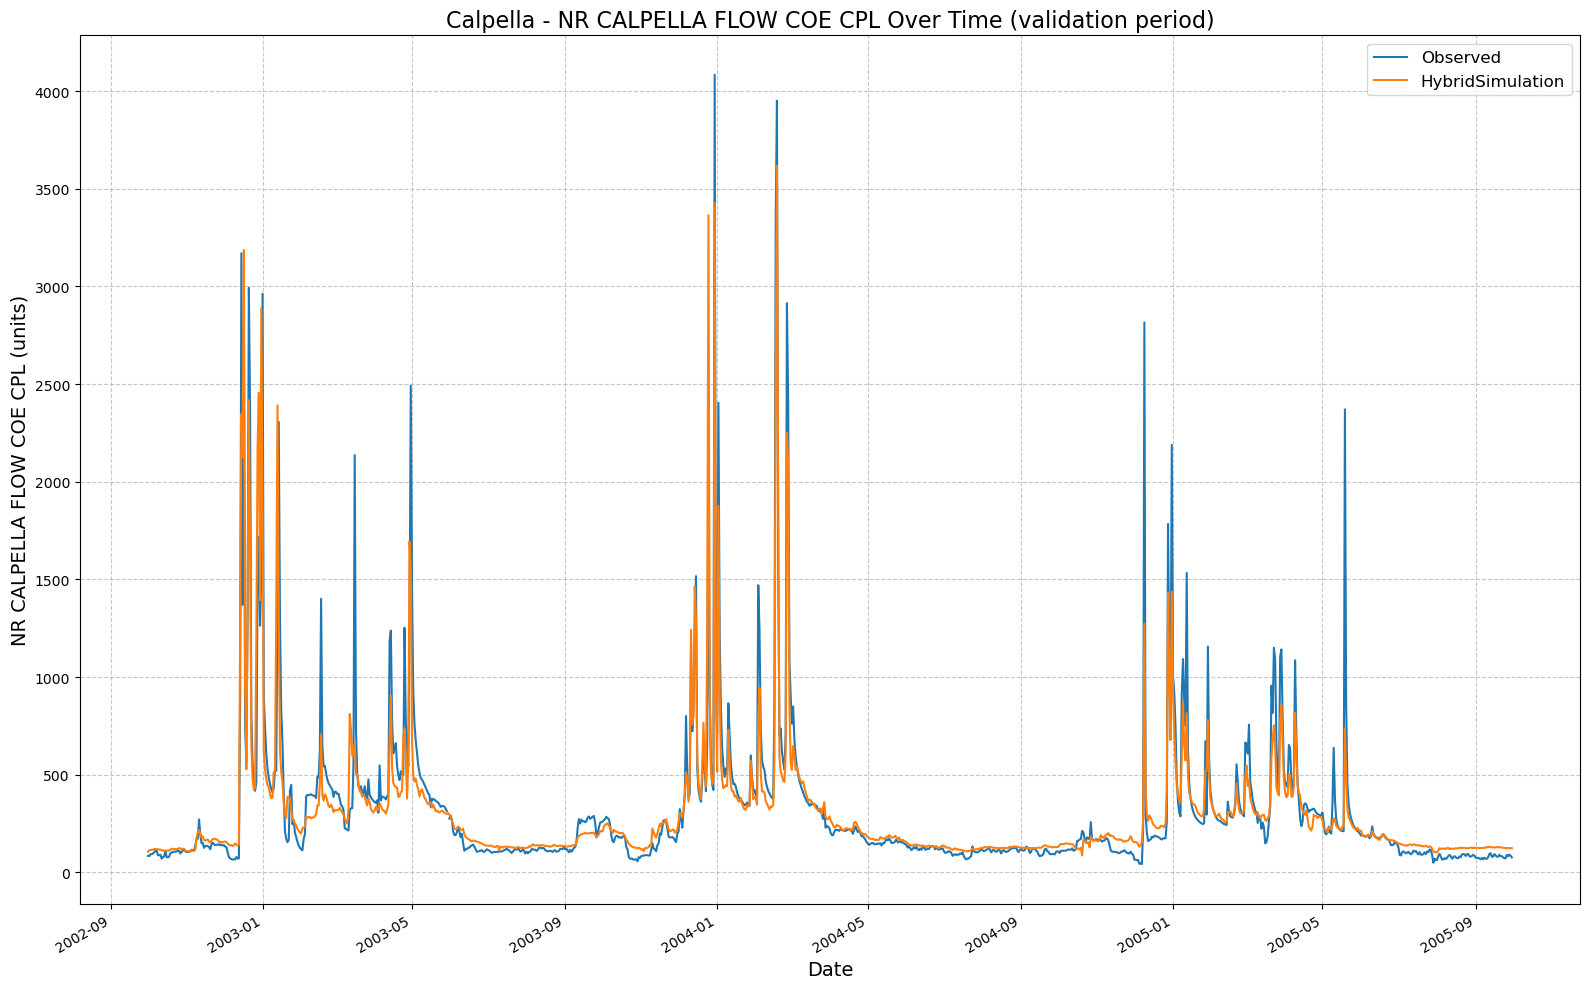

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163103\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.8266293555498123,
 'MSE': 29700.171875,
 'RMSE': 172.33737805537137,
 'KGE': 0.8267518163875397,
 'Alpha-NSE': 0.8558415325019166,
 'Beta-KGE': 0.96299147605896,
 'Beta-NSE': -0.028314136113301375,
 'Pearson-r': 0.9113228409942771,
 'FHV': -10.039953142404556,
 'FMS': -20.55610039727661,
 'FLV': 52.635696017603316,
 'Peak-Timing': 0.2,
 'Peak-MAPE': 40.69796085357666}

In [26]:
lstmPhysicsDaily.results()

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\n

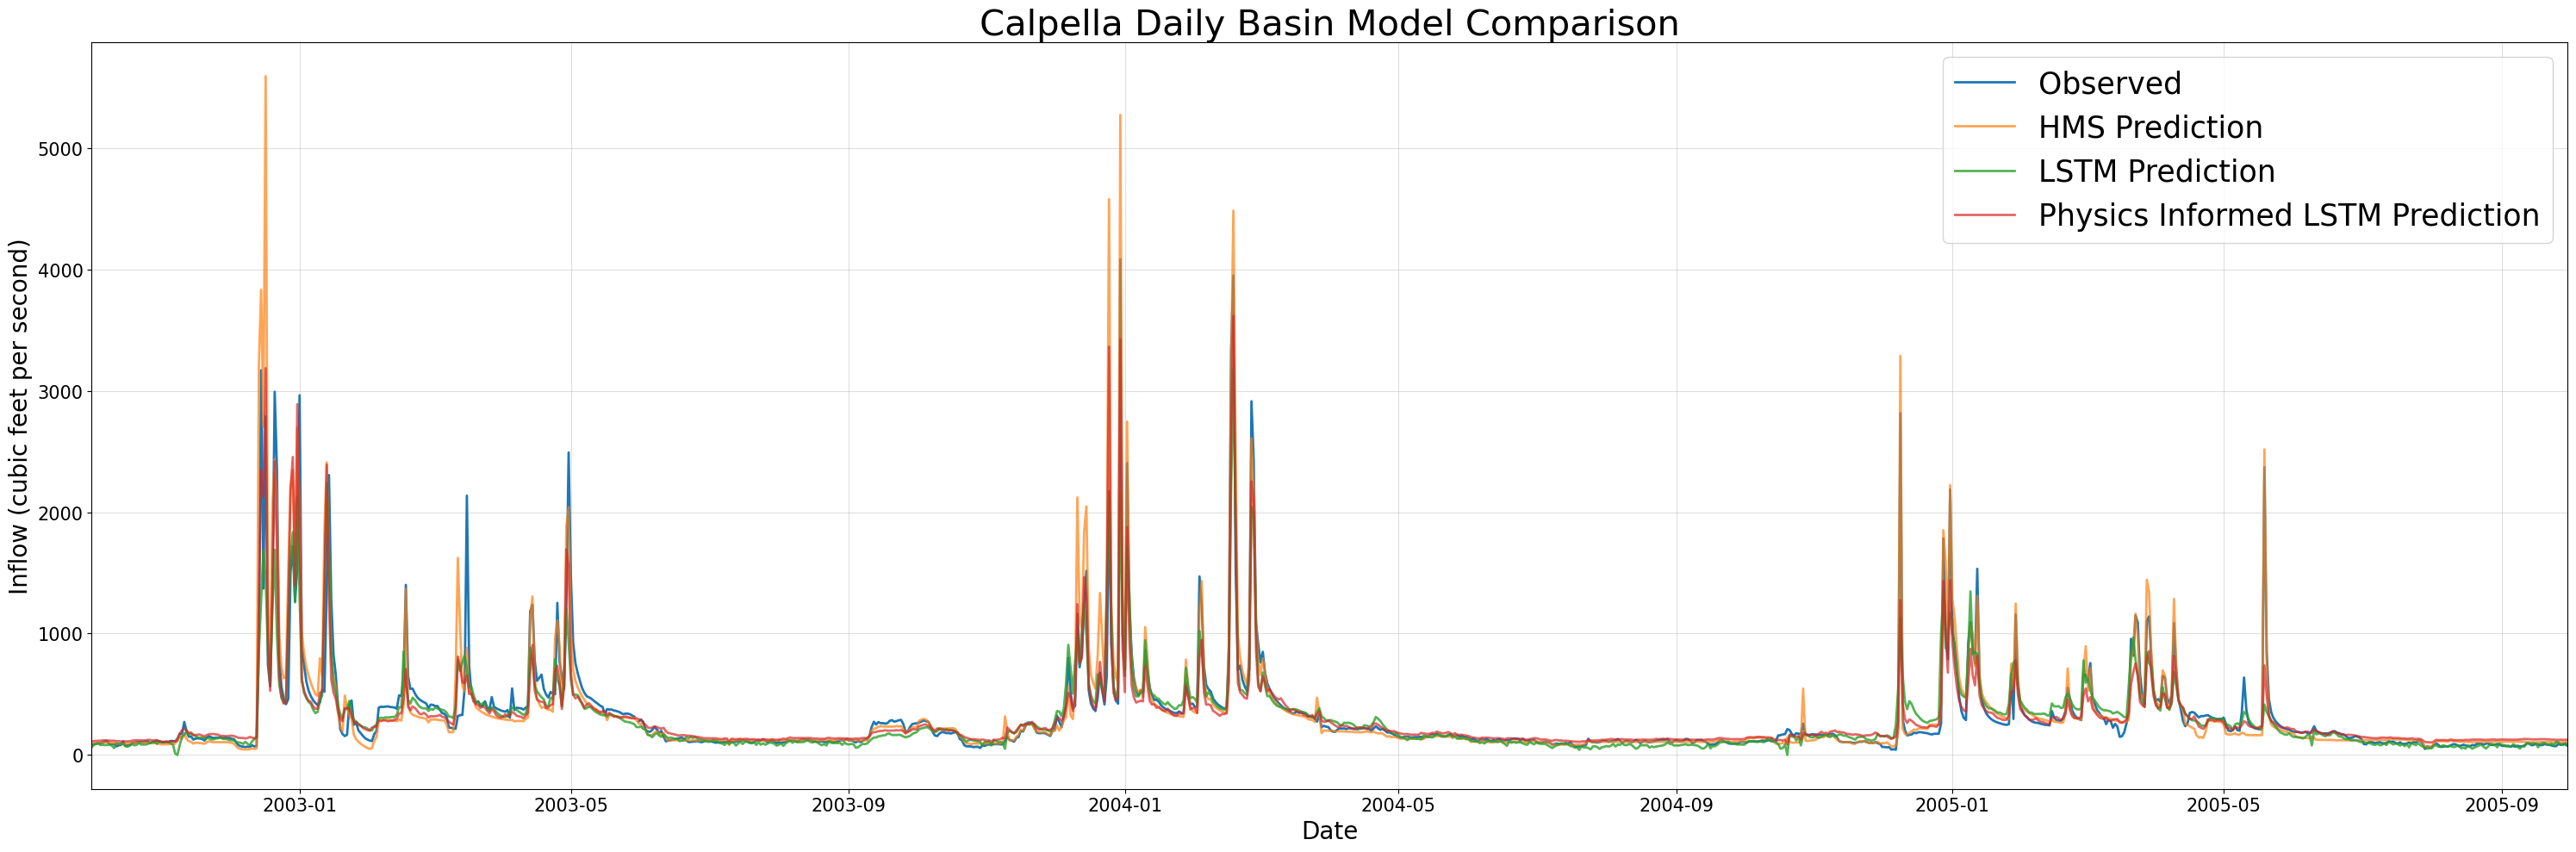

In [57]:
lstm_results_path = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_162958/testing_run_0602_163021/results_output_validation.csv'
lstmPhysics_results_path = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_163103/results_output_validation.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Calpella Daily Basin Model Comparison', fName = "calpella_daily_eval_metrics.csv")

In [59]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.749141,0.756999,0.826629
MSE,42974.708479,41628.536905,29700.170861
RMSE,207.303421,204.030725,172.337375
KGE,0.757358,0.713150,0.826752
Alpha-NSE,1.223982,0.750419,0.855842
Beta-KGE,1.045461,0.922167,0.962991
Beta-NSE,0.034781,-0.059548,-0.028314
Pearson-r,0.918511,0.881957,0.911323
FHV,19.067588,-29.799467,-10.039954
FMS,-9.037004,6.204451,-20.556118


## If you prefer the interactive plotly graph , you can use 'fancyCombinedPlot' (must have plotly library downloaded)

In [61]:
#lstm_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_164712/results_output_validation.csv'
#lstmPhysics_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_173955/results_output_validation.csv'
path_to_physics_data = Path(library_path +"/russian_river_data/Calpella_daily.csv")

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\n

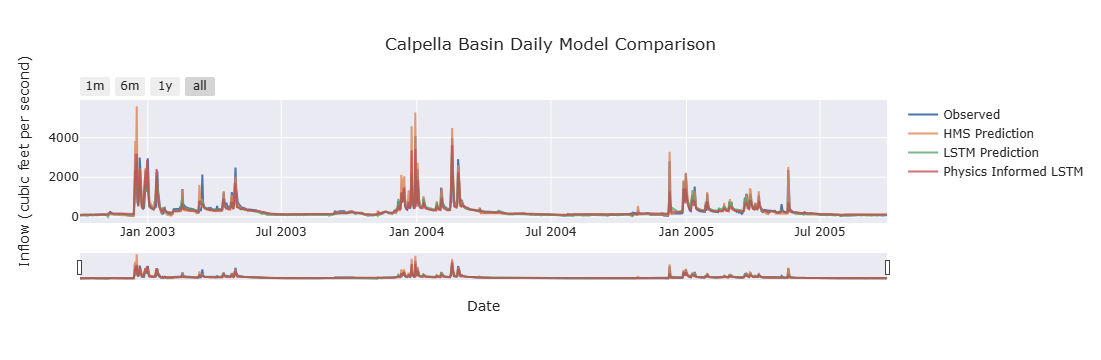

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.749141,0.756999,0.826629
MSE,42974.708479,41628.536905,29700.170861
RMSE,207.303421,204.030725,172.337375
KGE,0.757358,0.713150,0.826752
Alpha-NSE,1.223982,0.750419,0.855842
Beta-KGE,1.045461,0.922167,0.962991
Beta-NSE,0.034781,-0.059548,-0.028314
Pearson-r,0.918511,0.881957,0.911323
FHV,19.067588,-29.799467,-10.039954
FMS,-9.037004,6.204451,-20.556118


In [63]:
fancyCombinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_eval_metrics.csv")

## Re-train standard daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [37]:
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [39]:
lstmNoPhysicsDailyExt.train()

2025-02-06 16:35:08,276: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\output.log initialized.
2025-02-06 16:35:08,279: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508
2025-02-06 16:35:08,281: ### Run configurations for testing_run
2025-02-06 16:35:08,285: experiment_name: testing_run
2025-02-06 16:35:08,287: train_basin_file: calpella
2025-02-06 16:35:08,290: validation_basin_file: calpella
2025-02-06 16:35:08,294: test_basin_file: calpella
2025-02-06 16:35:08,296: train_start_date: 1994-10-01 00:00:00
2025-02-06 16:35:08,298: train_end_date: 2005-09-30 00:00:00
2025-02-06 16:35:08,300: validation_start_date: 2002-10-01 00:00:00
2025-02-06 16:35:08,302: validation_end_date: 2005-09-30 00:00:00
2025-02-06 16:35:08,304: test_start_date: 2005-10-01 00:00:00
2025-02-06 16:35:08,305: test_end_date: 2009-09-30 00:00:00
2025-02-06 16:35:08,307: device: cpu
2025-02-06 16:35

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]
2025-02-06 16:35:35,178: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\validation\model_epoch016\validation_metrics.csv
2025-02-06 16:35:35,181: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_163508')

2025-02-06 16:35:50,488: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
2025-02-06 16:35:51,100: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\test\model_epoch016\test_metrics.csv
2025-02-06 16:35:51,102: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\test\model_epoch016\test_results.p
got predictions


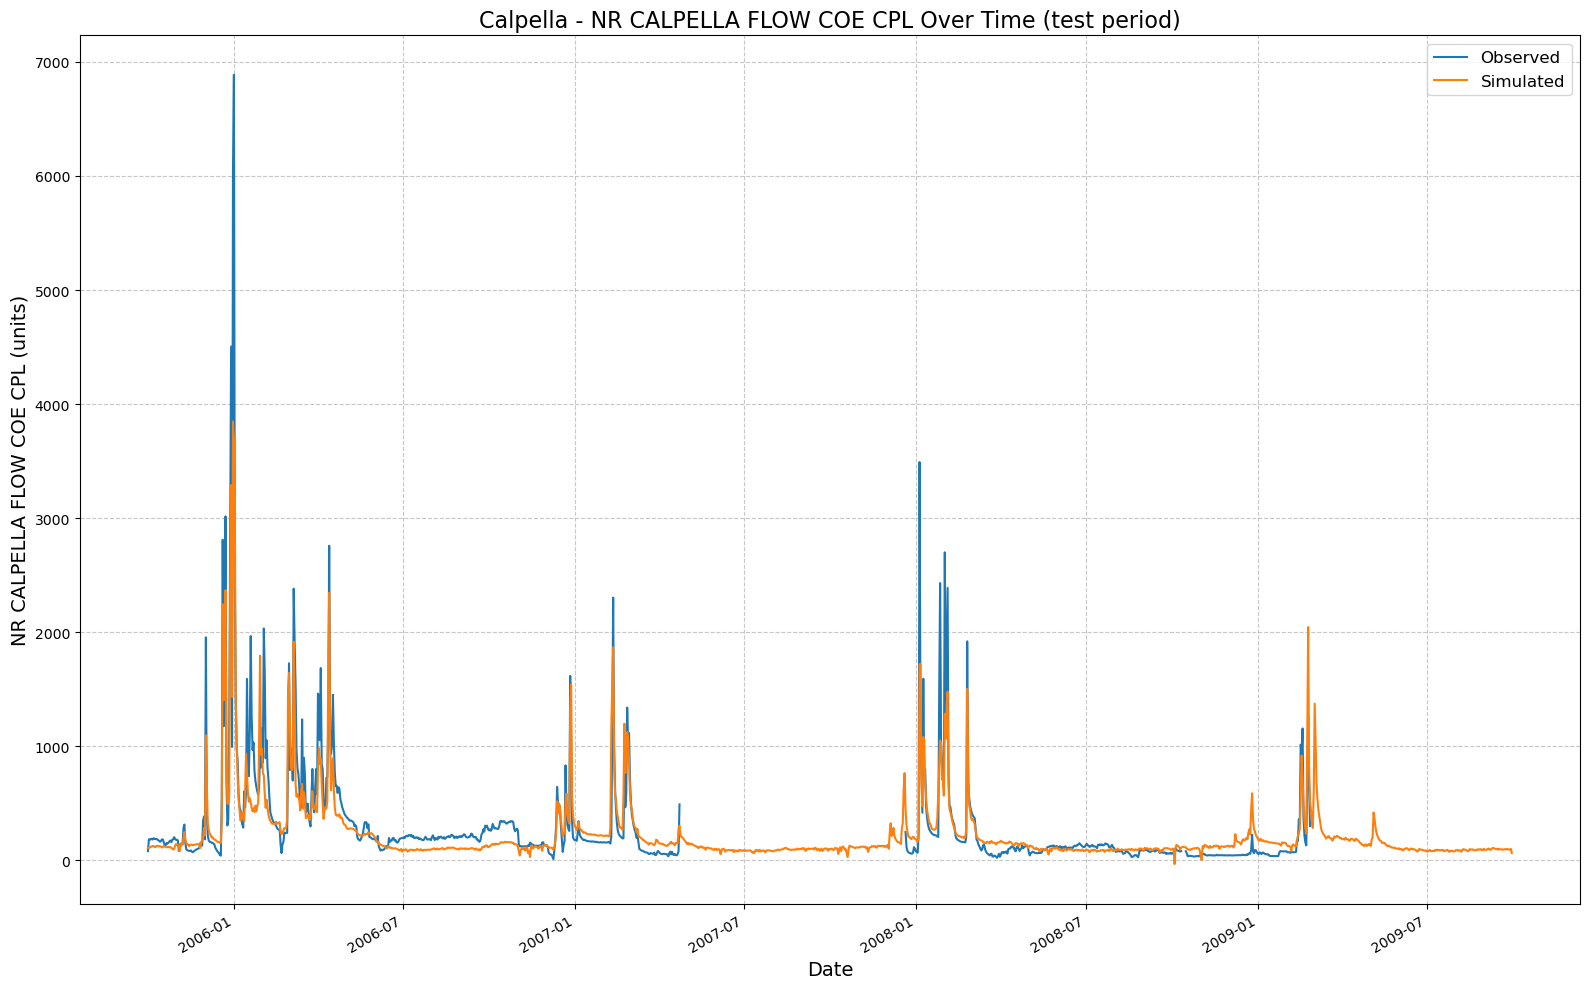

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163508\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.7879192531108856,
 'MSE': 53968.57421875,
 'RMSE': 232.31137341669262,
 'KGE': 0.7039403311984544,
 'Alpha-NSE': 0.7302378970256475,
 'Beta-KGE': 0.9222065806388855,
 'Beta-NSE': -0.045685320337718056,
 'Pearson-r': 0.9060429928433145,
 'FHV': -24.984222650527954,
 'FMS': -17.457773519952084,
 'FLV': -1011.5237848575154,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 38.59381675720215}

In [41]:
lstmNoPhysicsDailyExt.results('test')

## Re-train physics daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [45]:
path_to_physics_data = Path(library_path +"/russian_river_data/Calpella_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
lstmPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [47]:
lstmPhysicsDailyExt.train()

2025-02-06 16:37:18,625: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\output.log initialized.
2025-02-06 16:37:18,628: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718
2025-02-06 16:37:18,631: ### Run configurations for testing_run
2025-02-06 16:37:18,636: experiment_name: testing_run
2025-02-06 16:37:18,639: train_basin_file: calpella
2025-02-06 16:37:18,642: validation_basin_file: calpella
2025-02-06 16:37:18,646: test_basin_file: calpella
2025-02-06 16:37:18,649: train_start_date: 1994-10-01 00:00:00
2025-02-06 16:37:18,652: train_end_date: 2005-09-30 00:00:00
2025-02-06 16:37:18,654: validation_start_date: 2002-10-01 00:00:00
2025-02-06 16:37:18,655: validation_end_date: 2005-09-30 00:00:00
2025-02-06 16:37:18,657: test_start_date: 2005-10-01 00:00:00
2025-02-06 16:37:18,660: test_end_date: 2009-09-30 00:00:00
2025-02-06 16:37:18,662: device: cpu
2025-02-06 16:37

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]
2025-02-06 16:37:50,791: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\validation\model_epoch016\validation_metrics.csv
2025-02-06 16:37:50,794: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_163718')

2025-02-06 16:37:51,983: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
2025-02-06 16:37:52,793: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\test\model_epoch016\test_metrics.csv
2025-02-06 16:37:52,796: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\test\model_epoch016\test_results.p
got predictions


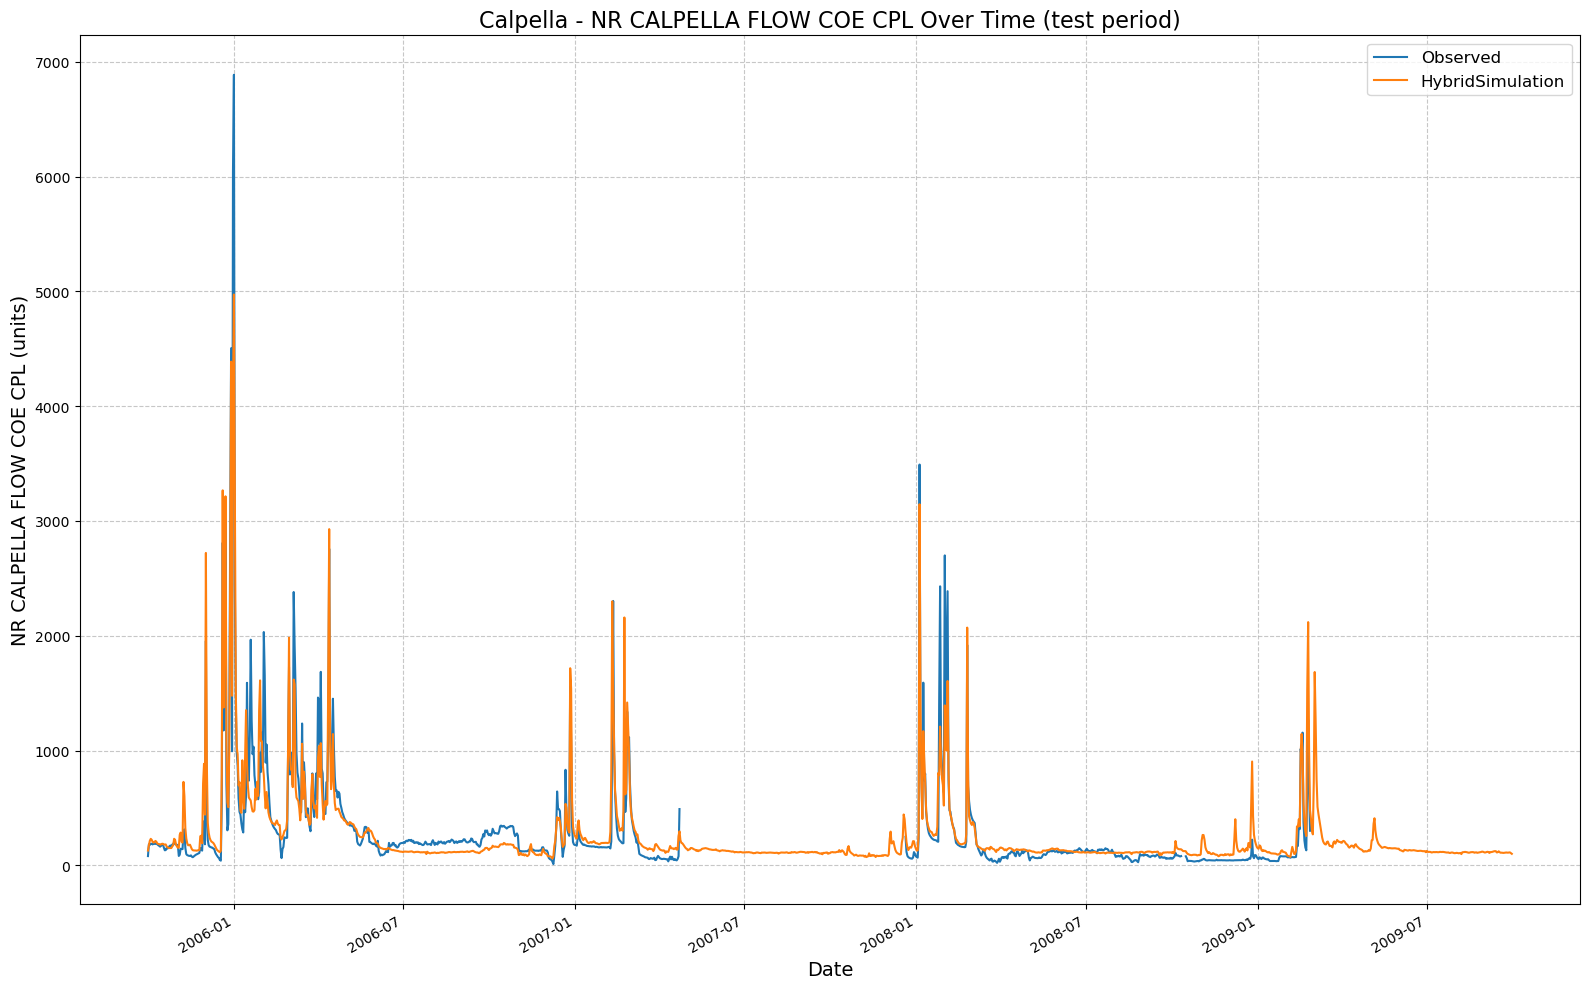

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_0602_163718\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.8352183997631073,
 'MSE': 41932.27734375,
 'RMSE': 204.7737222979306,
 'KGE': 0.8489366154078137,
 'Alpha-NSE': 0.8789379210972031,
 'Beta-KGE': 1.0300137996673584,
 'Beta-NSE': 0.01762601707465201,
 'Pearson-r': 0.9147750562000336,
 'FHV': -8.169908821582794,
 'FMS': -14.724427386965228,
 'FLV': 64.47327917751002,
 'Peak-Timing': 0.0,
 'Peak-MAPE': 23.440675735473633}

In [49]:
lstmPhysicsDailyExt.results('test')

## compare results

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\n

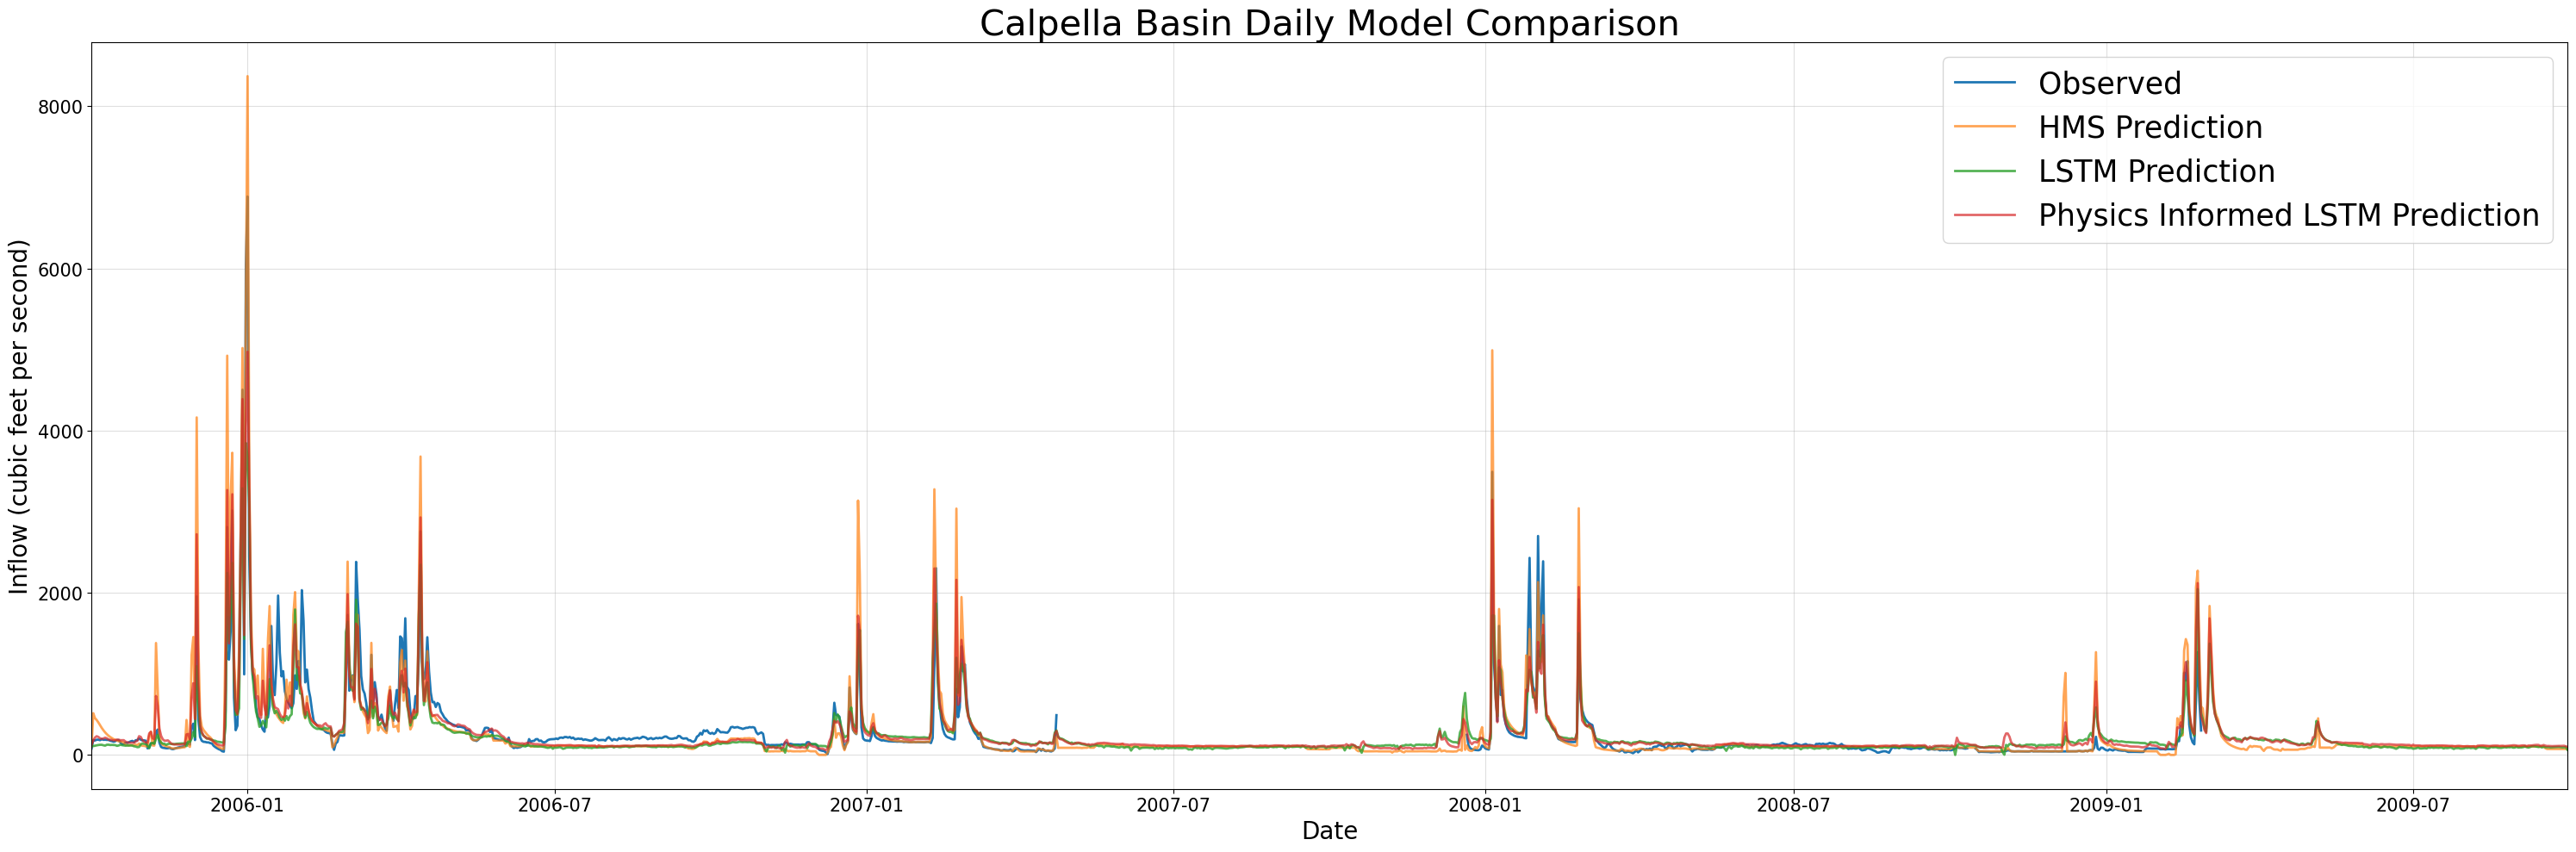

In [65]:
lstm_results_path_ext = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_163508/results_output_test.csv'
lstmPhysics_results_path_ext = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0602_163718/results_output_test.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_metrics.csv")

In [53]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.699238,0.787944,0.835218
MSE,76535.402021,53962.279434,41932.278604
RMSE,276.650324,232.297825,204.773725
KGE,0.746450,0.703930,0.848937
Alpha-NSE,1.224663,0.730186,0.878938
Beta-KGE,1.058923,0.922318,1.030014
Beta-NSE,0.034604,-0.045620,0.017626
Pearson-r,0.898302,0.906068,0.914775
FHV,25.593701,-24.984220,-8.169908
FMS,-0.006060,-17.457777,-14.724434


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\n

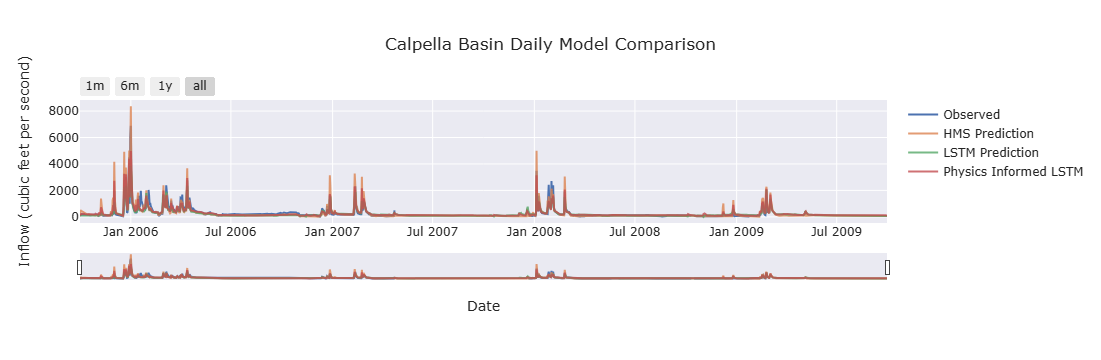

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.699238,0.787944,0.835218
MSE,76535.402021,53962.279434,41932.278604
RMSE,276.650324,232.297825,204.773725
KGE,0.746450,0.703930,0.848937
Alpha-NSE,1.224663,0.730186,0.878938
Beta-KGE,1.058923,0.922318,1.030014
Beta-NSE,0.034604,-0.045620,0.017626
Pearson-r,0.898302,0.906068,0.914775
FHV,25.593701,-24.984220,-8.169908
FMS,-0.006060,-17.457777,-14.724434


In [67]:
fancyCombinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_metrics.csv")